In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TSAACS: Exercise Sheet 1 - Dominik Mayer #

## Exercise 2 ##

### Task 1 ###

Take the Poisson equation and apply it to a football team:
We take the goals-scored-per-game rate of a team and model the probability of goals scored by this team in a random match.
By Taking the mean over increasing sample sizes, we expect convergence to the rate

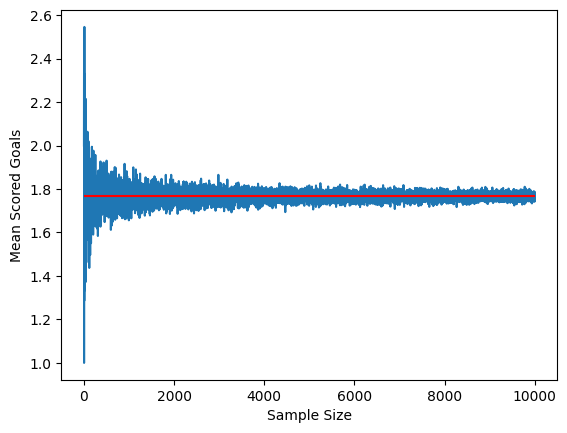

In [32]:
# function for sample mean for each sample size i up to n
def sample_mean_poisson(ld,n):
    res = np.zeros(n)
    for i in range(n):
        res[i] = np.random.poisson(ld,i+1).mean()

    return res


# set parameters
ld = 53/30 #goals scored / games played
max_n = 10000 #Maximum number of samples


# run simulation up to sample size 1000
results = sample_mean_poisson(ld,max_n)

# plot the results
plt.plot(results)
plt.ylabel("Mean Scored Goals")
plt.xlabel("Sample Size")

# Plot value of lambda
plt.hlines(y=ld, xmin=0, xmax=max_n, colors="red")


### Task 2 ###

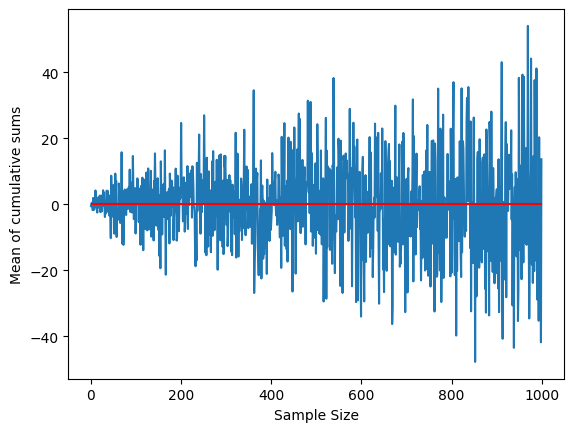

In [81]:
# Function to compute mean of cumulative sums of standard normal distribution up to sample size n
def cum_sum_mean(n):
    y = np.zeros(n)
    x = np.random.normal(size=n)

    for t in range(n):
        y[t] = x[0:t+1].sum()
    return y.mean()

# Calculate the results from sample size 1 up to 1000
max_n = 1000
y_mean = np.zeros(max_n)

for n in range(max_n):
    y_mean[n] = cum_sum_mean(n+1)

# plot the results
plt.plot(y_mean)
plt.ylabel("Mean of cumulative sums")
plt.xlabel("Sample Size")

# Plot value of distribution-mean
plt.hlines(y=0, xmin=0, xmax=max_n, colors="red")


Clearly, for increasing sample size, the mean of the cumulative sums does not converge to the mean of the distribution.
The reason for this is that the $y_t, t \le n$ for a given sample size n are not independent from each other. ($y_{t+1} = y_t + x_{t+1}$). 

Which means that the for example the sample value $x_1$ has a much larger influence to the mean than the sample value $x_{999}$

## Exercise 3 ##

### Task 1 ###

The function asked for uses the binomial distribution (with probability 1/6 to throw a six).

In [99]:
# n defines how many times we throw the dice until a six occurs
def roll_dice_until_six(n):
    res = np.zeros(n)
    for i in range(n):
        success = 0
        tries = 0
        while success != 1:
            tries += 1
            success = np.random.binomial(n=1,p=(1/6))
        res[i] = tries
    return res

# Test the function by executing the experiment a few times
n = 10
roll_dice_until_six(n)

array([ 2.,  1.,  7., 11.,  8., 16.,  1.,  5.,  3.,  4.])

### Task 2 ###

We plot the means as described in the task. To check the Strong law of large numbers we need to see if the mean converges towards the Expectation Value. For that we note that the amount of throws necessary for a success with probability $p = \frac{1}{6}$ can be modelled by the geometric distribution, which has the expectation value 

$\mathbb{E}[x] = \frac{1}{p} = \frac{1}{\frac{1}{6}} = 6 $

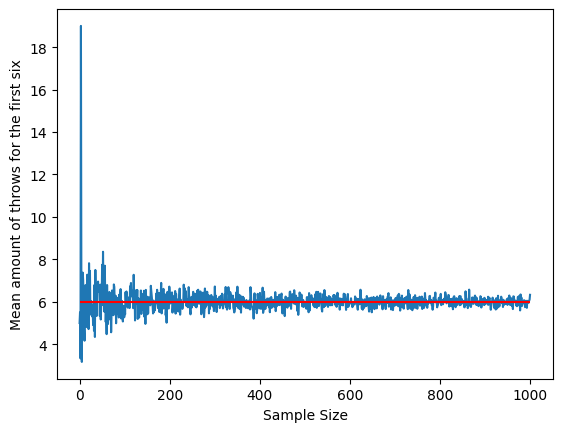

In [102]:
# Generate samples
max_n = 1000
x_mean = np.zeros(max_n)

for n in range(max_n):
    x_mean[n] = roll_dice_until_six(n+1).mean()

# plot the results
plt.plot(x_mean)
plt.ylabel("Mean amount of throws for the first six")
plt.xlabel("Sample Size")

# Plot Expectation Value of geometric distribution (1/p = 1/(1/6) = 6)
plt.hlines(y=6, xmin=0, xmax=max_n, colors="red")


We observe that indeed, the mean seems to converge to the expectation value for increasing sample size

### Task 3 ###

The proof of the expectation value for the geometric distribution can be found in the written notes above